# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 20
2. Student Names - Jahnavi Angati(ja54632), Anisha Singh(as229583)

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. **(2 points)** Write down the class-conditional data distributions for each of the classes defined above.

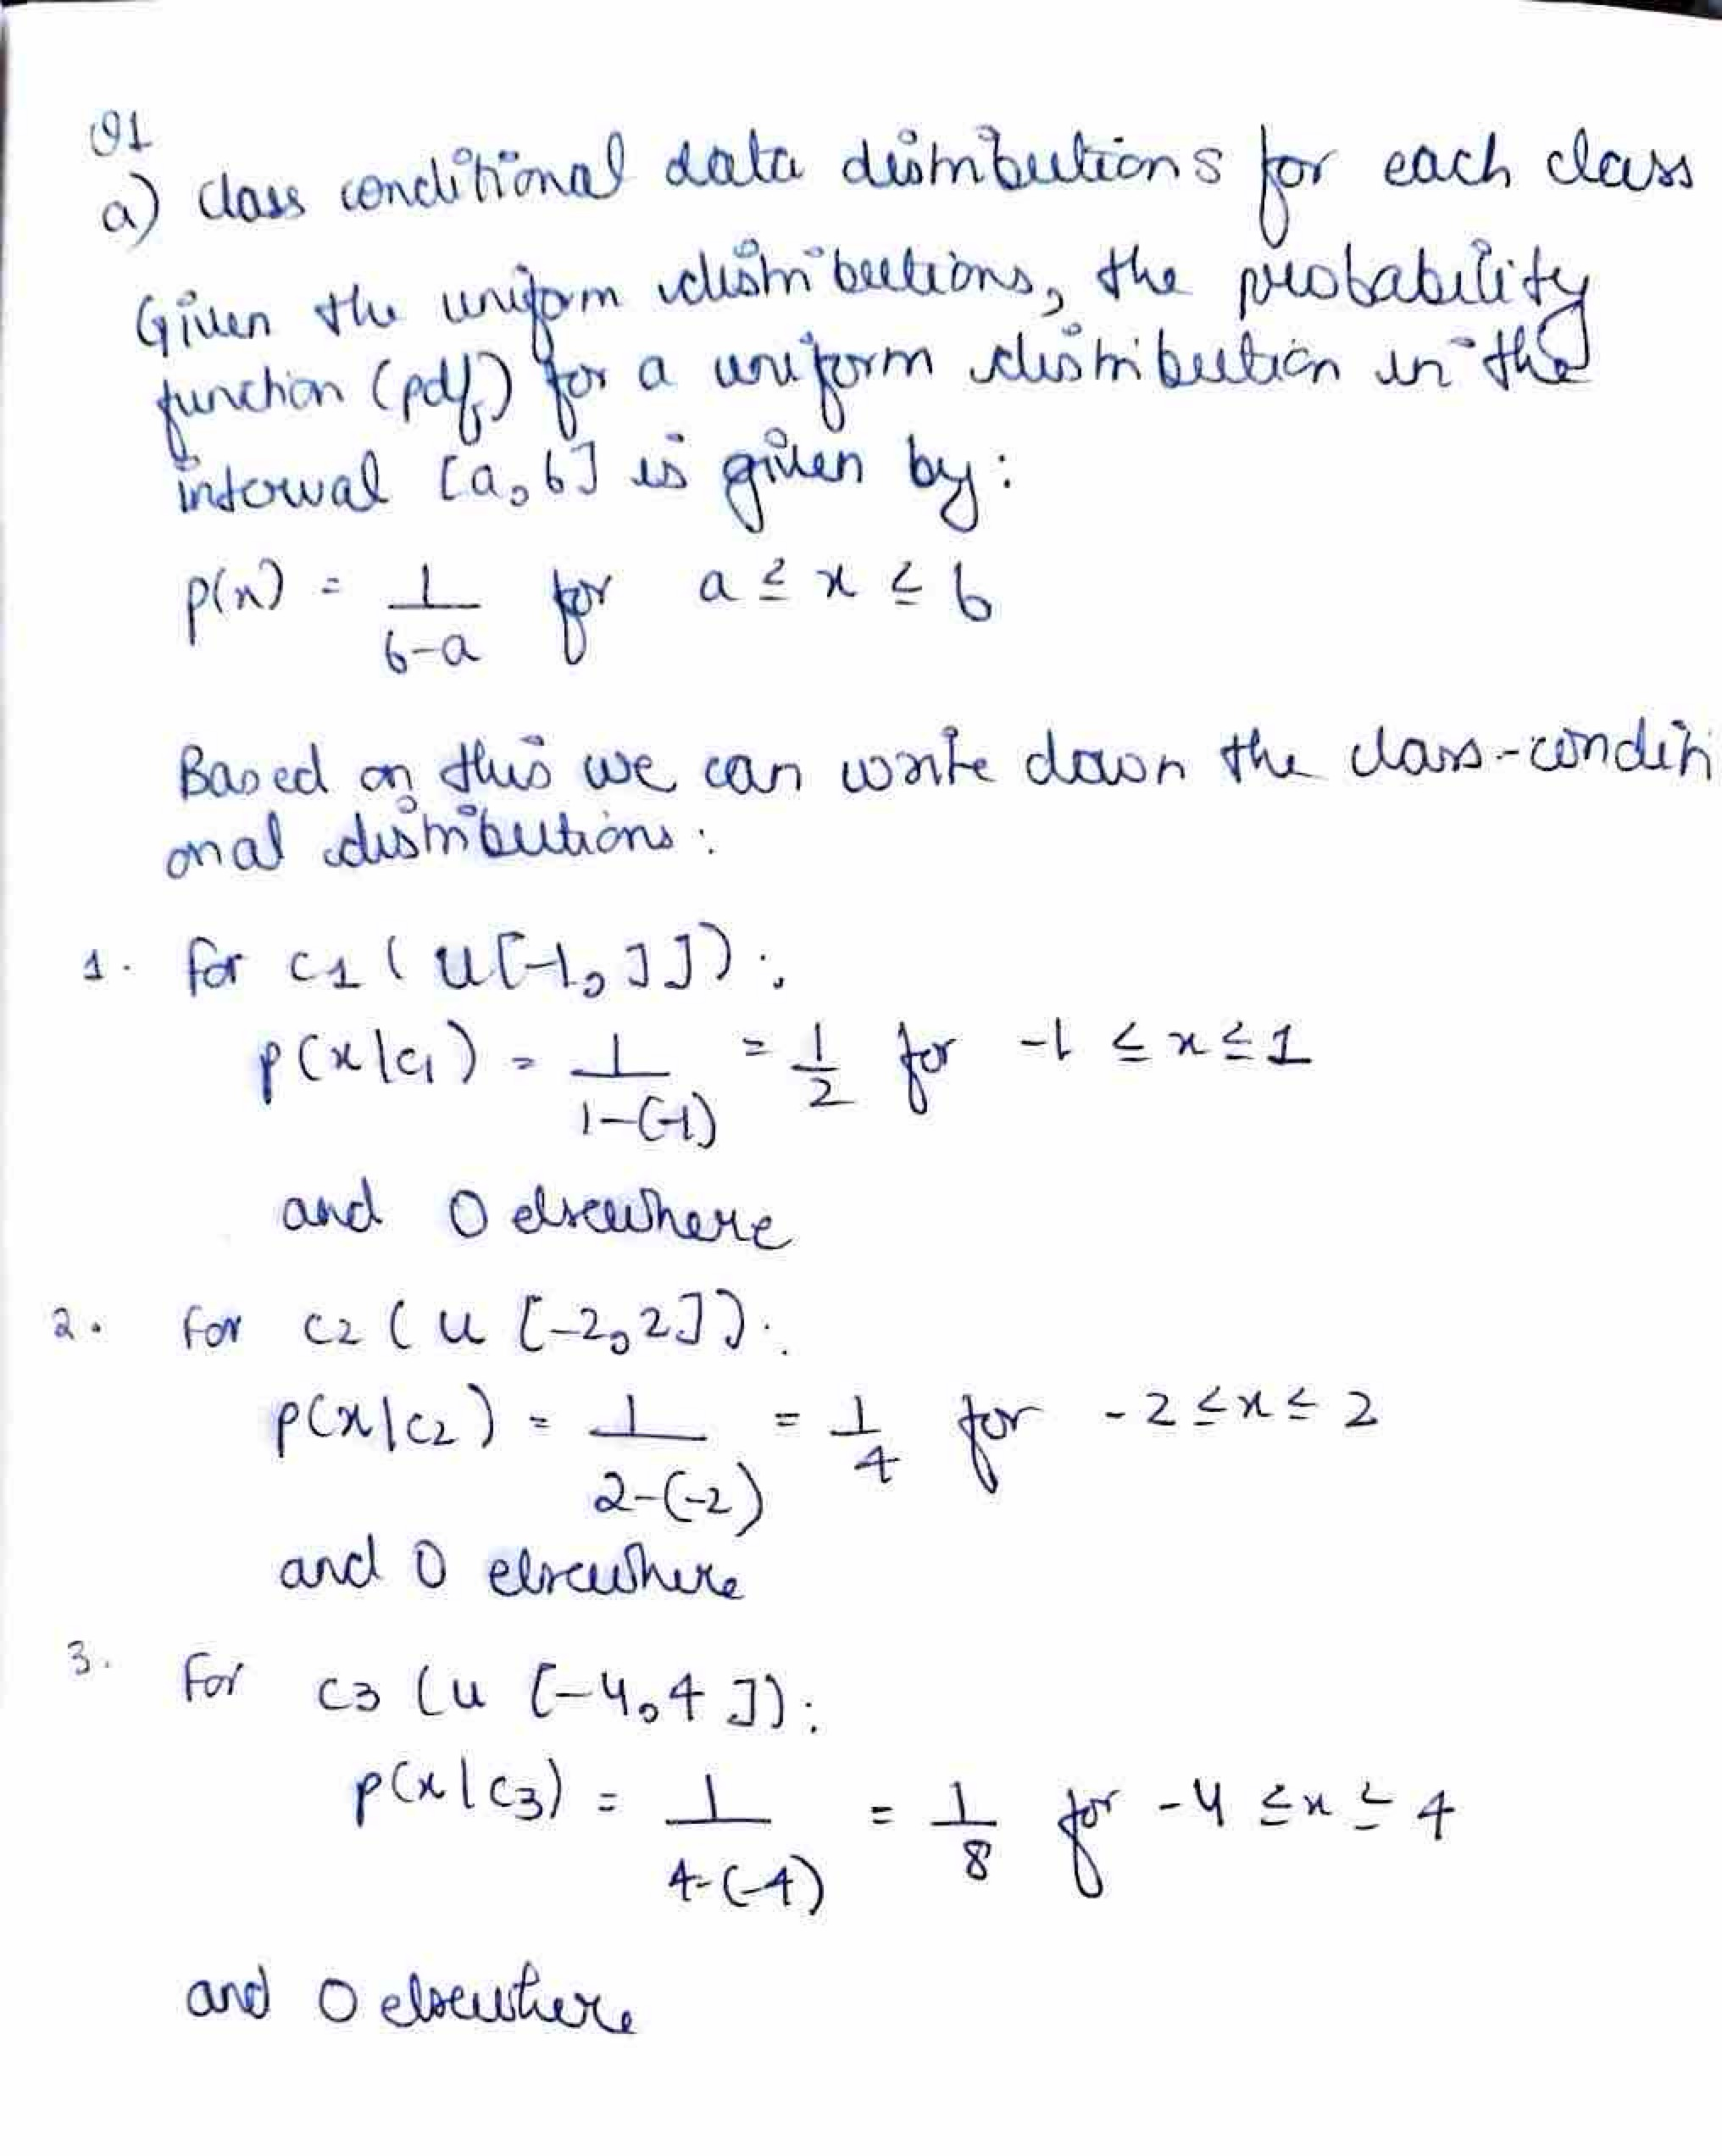

b. **(4 points)**. Derive the Bayes optimal decision boundaries for this problem.

c. **(4 points)** What is the Bayes Error rate for this classifier?

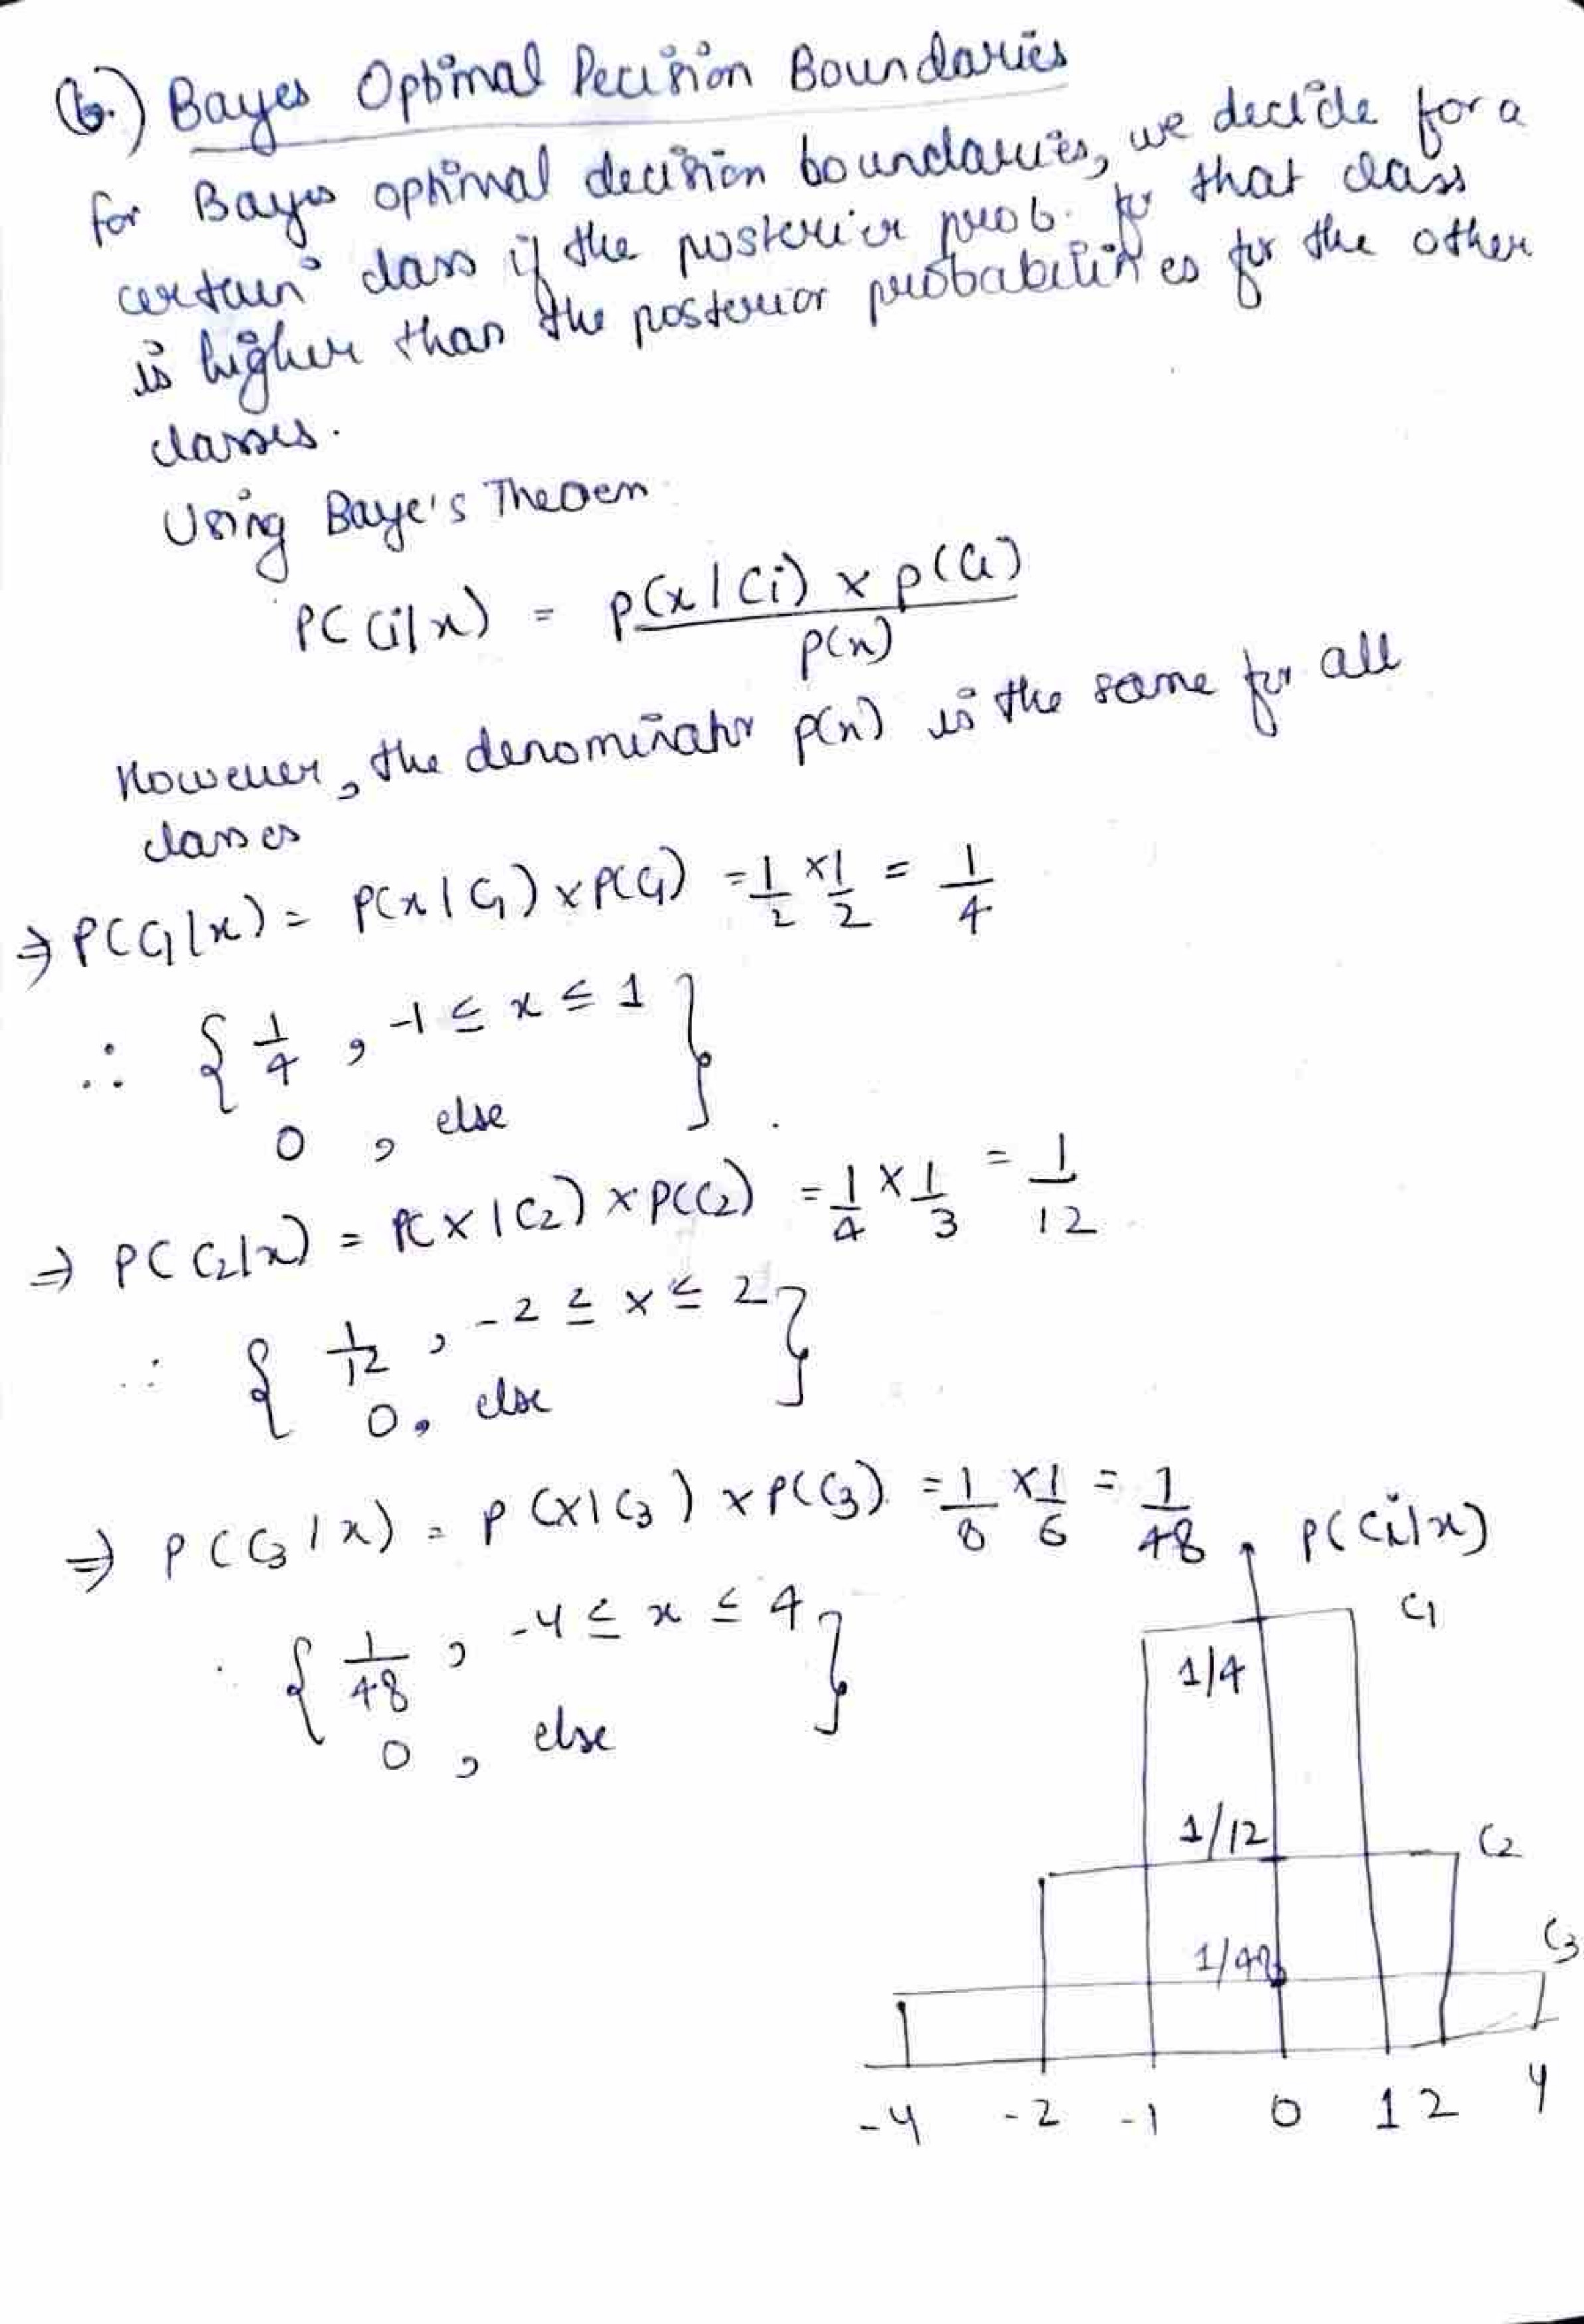

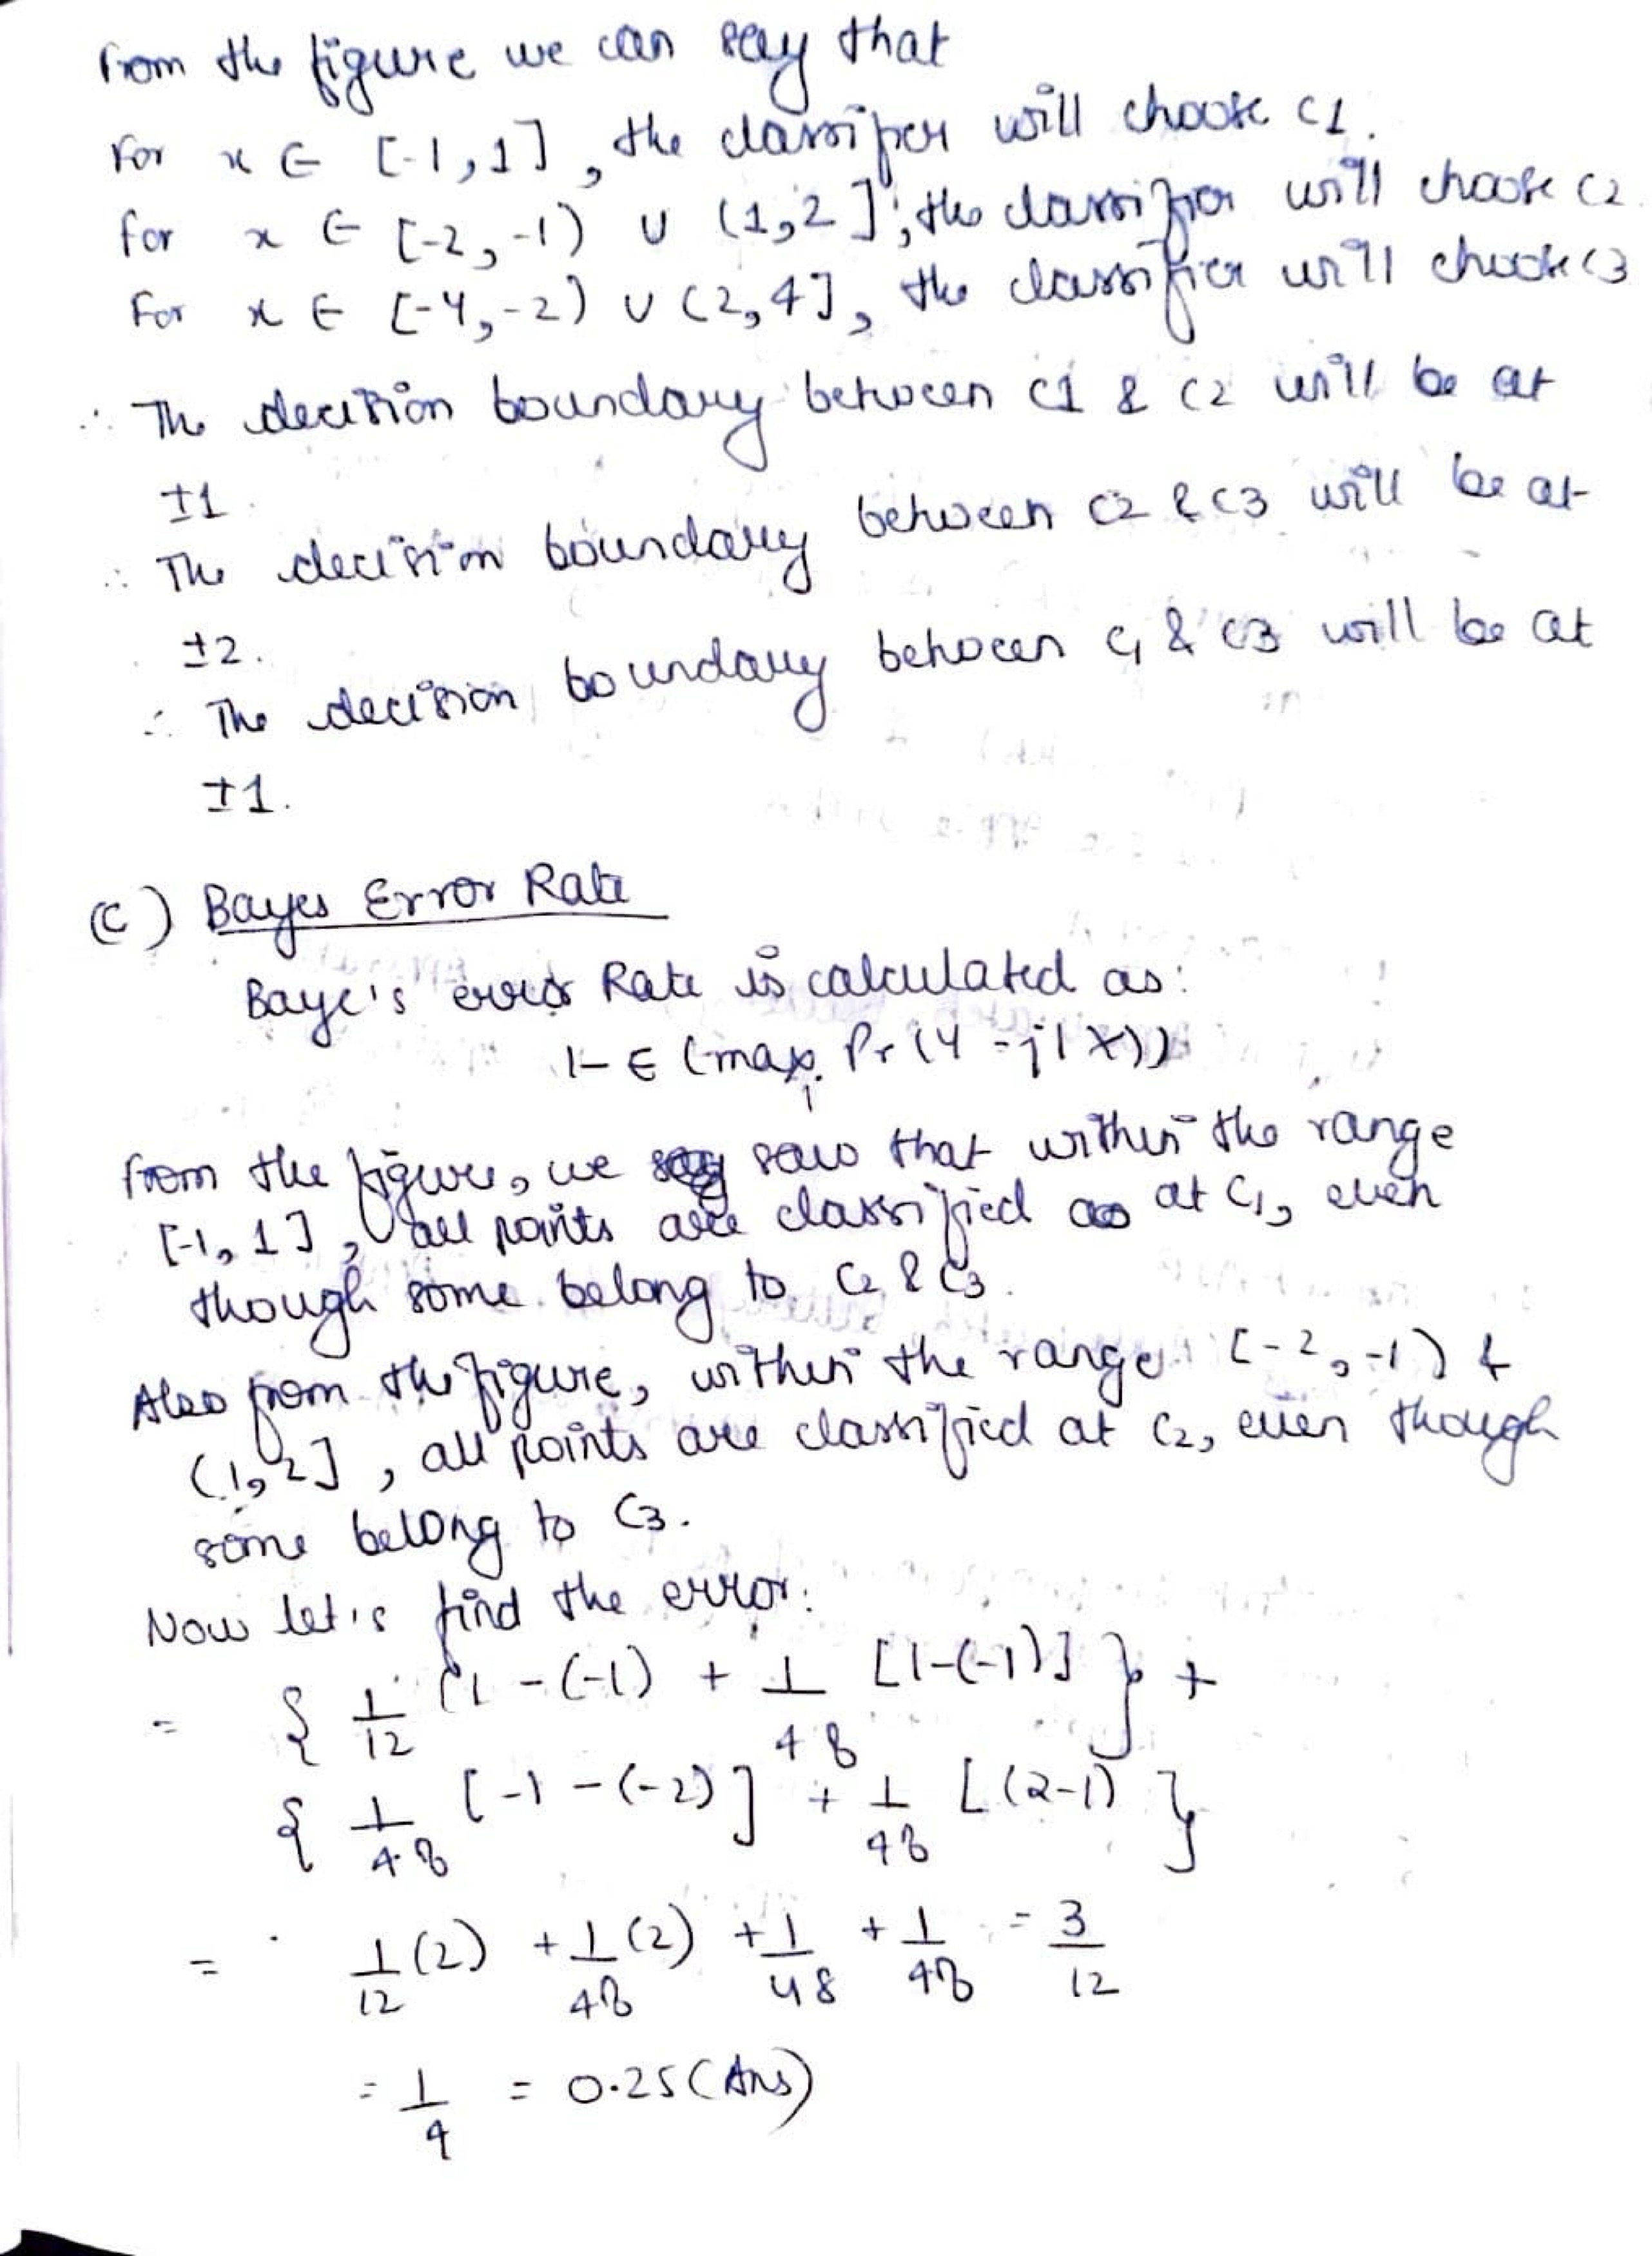

## Q2. (10 points) Multi-class Logistic Regression Derivation

To use Logistic Regression for multi-class setting with K classes - $\{1,2, ... K\}$, we need to learn $K-1$ $d$-dimensional weight vectors, $\{w_1, w_2, ..., w_{K-1}\}$ which then provide the posterior probabilities for each class in the following way -

\begin{align}
  \mathbb{P} (y = k|x) =
  \begin{cases}
                                   \dfrac{exp(w_k^Tx)}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for }k \in [1,K-1] \\
                                   \dfrac{1}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for } k = K
  \end{cases}
\end{align}

Suppose you are given a dataset $(X,Y)$ consisting of $N$ data-points where each $x$ is in $d$-dimensions, and $y \in [1, 2, ... K]$.

a. **(3 points)** Write down the total conditional likelihood of observing the corresponding y's for the given x's in the dataset, under the model specified above.

b. **(7 points)** Derive the update equation for any $w_i$ that can be used to learn $w_i$ via gradient descent.

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [1]:
#conda install pytorch torchvision -c pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd


/Users/jahnaviangati/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


a. **(5 points)** Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [3]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', transform=transform, download=True)

### END CODE ###

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


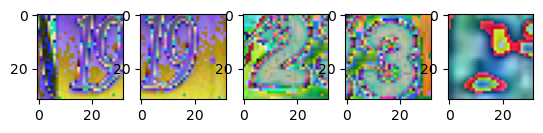

In [4]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. **(5 points)** Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [5]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_num, val_num])
### END CODE ###


# Create data loaders
### START CODE ###
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)
### END CODE ###

c. **(5 points)** Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.fc1 = nn.Linear(32 * 32 * 3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 10)
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        # First fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))
        
        # Second fully connected layer followed by ReLU activation
        x = F.relu(self.fc2(x))
        
        # Third fully connected layer
        x = self.fc3(x)
        ### END CODE ###
        return x


In [7]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###

d. **(5 points)** Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [8]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = F.cross_entropy(out, target)
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        # Zero gradients, perform backpropagation, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = F.cross_entropy(out, target)
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = torch.argmax(out, dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [9]:
epochs = 20
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 47.21it/s]


Epoch: 1 Train Loss: 1.4418547330949405 Val Loss: 1.0410509480826033 Val Acc: 0.6849576849576849


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.74it/s]


Epoch: 2 Train Loss: 0.9578006559900737 Val Loss: 0.92085931923036 Val Acc: 0.7247474747474747


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.14it/s]


Epoch: 3 Train Loss: 0.8402142142946428 Val Loss: 0.8531467478163998 Val Acc: 0.7441304941304941


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 47.17it/s]


Epoch: 4 Train Loss: 0.7632075535926627 Val Loss: 0.8014756864190524 Val Acc: 0.7619437619437619


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.04it/s]


Epoch: 5 Train Loss: 0.7154013789266604 Val Loss: 0.7553222952987729 Val Acc: 0.7788697788697788


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.82it/s]


Epoch: 6 Train Loss: 0.681007917806482 Val Loss: 0.729213615893146 Val Acc: 0.7897215397215397


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.06it/s]


Epoch: 7 Train Loss: 0.6473898884155941 Val Loss: 0.713969772609895 Val Acc: 0.7921785421785422


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.75it/s]


Epoch: 8 Train Loss: 0.6307992505565477 Val Loss: 0.6981822946359315 Val Acc: 0.8006415506415506


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.21it/s]


Epoch: 9 Train Loss: 0.6039069115637553 Val Loss: 0.6755842831481066 Val Acc: 0.8063745563745564


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.02it/s]


Epoch: 10 Train Loss: 0.5889085864900739 Val Loss: 0.7036980500710717 Val Acc: 0.7988670488670488


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.08it/s]


Epoch: 11 Train Loss: 0.5759053328157071 Val Loss: 0.6758225041596967 Val Acc: 0.8070570570570571


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.97it/s]


Epoch: 12 Train Loss: 0.5679611955498807 Val Loss: 0.664013738047058 Val Acc: 0.8088315588315589


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.93it/s]


Epoch: 13 Train Loss: 0.5532734662973273 Val Loss: 0.6824522603414047 Val Acc: 0.8031668031668031


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.02it/s]


Epoch: 14 Train Loss: 0.5456085091137193 Val Loss: 0.6727407005130676 Val Acc: 0.8073300573300574


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.47it/s]


Epoch: 15 Train Loss: 0.5351366994273347 Val Loss: 0.666079758377372 Val Acc: 0.8104013104013104


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.96it/s]


Epoch: 16 Train Loss: 0.5241044397494887 Val Loss: 0.67205902778676 Val Acc: 0.8106060606060606


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.13it/s]


Epoch: 17 Train Loss: 0.5207428709093331 Val Loss: 0.6550478240993223 Val Acc: 0.8151788151788152


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.05it/s]


Epoch: 18 Train Loss: 0.508623371265842 Val Loss: 0.6525180641009513 Val Acc: 0.8191373191373191


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 49.05it/s]


Epoch: 19 Train Loss: 0.5002387162005878 Val Loss: 0.6340307027646631 Val Acc: 0.8255528255528255


100%|███████████████████████████████████████████| 58/58 [00:01<00:00, 48.56it/s]

Epoch: 20 Train Loss: 0.5019007274329729 Val Loss: 0.6374372468435989 Val Acc: 0.8202975702975703


e. **(5 points)** Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 47.16it/s]


Test accuracy: 0.7908343577135832


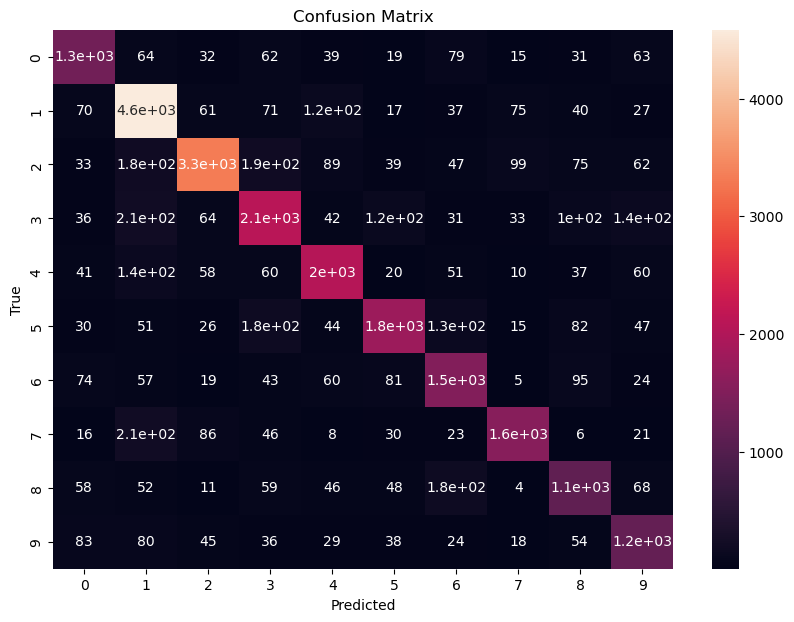

In [10]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        pred = torch.argmax(out, dim=1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.extend(target.numpy())
        all_y_pred.extend(pred.numpy())
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = confusion_matrix(all_y_true, all_y_pred)
### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Q4. (10 points) Bayesian Belief Networks

a) **(3 points)** Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

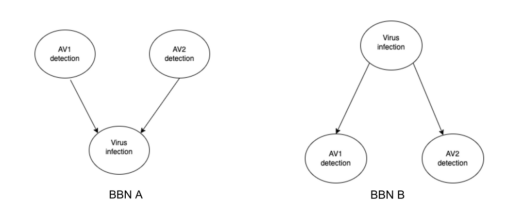

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
img_A = mpimg.imread('BBN-A.png')
img_B = mpimg.imread('BBN-B.png')

fig, ax = plt.subplots(1,2)
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

<div style="background-color:lightblue; color:black; padding:10px;">

**BBN A:**

1. This network suggests that the two anti-virus systems (let's call them AV1 and AV2) are independent of each other.
2. The presence of an infection affects the detections of both AV1 and AV2.
3. The detections by AV1 and AV2 are directly influenced by the actual infection.

**BBN B:**

1. This network suggests a dependency between the two anti-virus systems.
2. The presence of an infection affects the detection of AV1.
3. The detection by AV2 is influenced by both the actual infection and the detection of AV1, implying some dependence between the two systems.

Given the scenario, where the two anti-virus systems are independent and use different algorithms for detection, **BBN A** captures the independence assumptions correctly. Each anti-virus system operates independently, and their detections are based solely on the presence or absence of an infection.
</div>


b) **(7 points)** From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

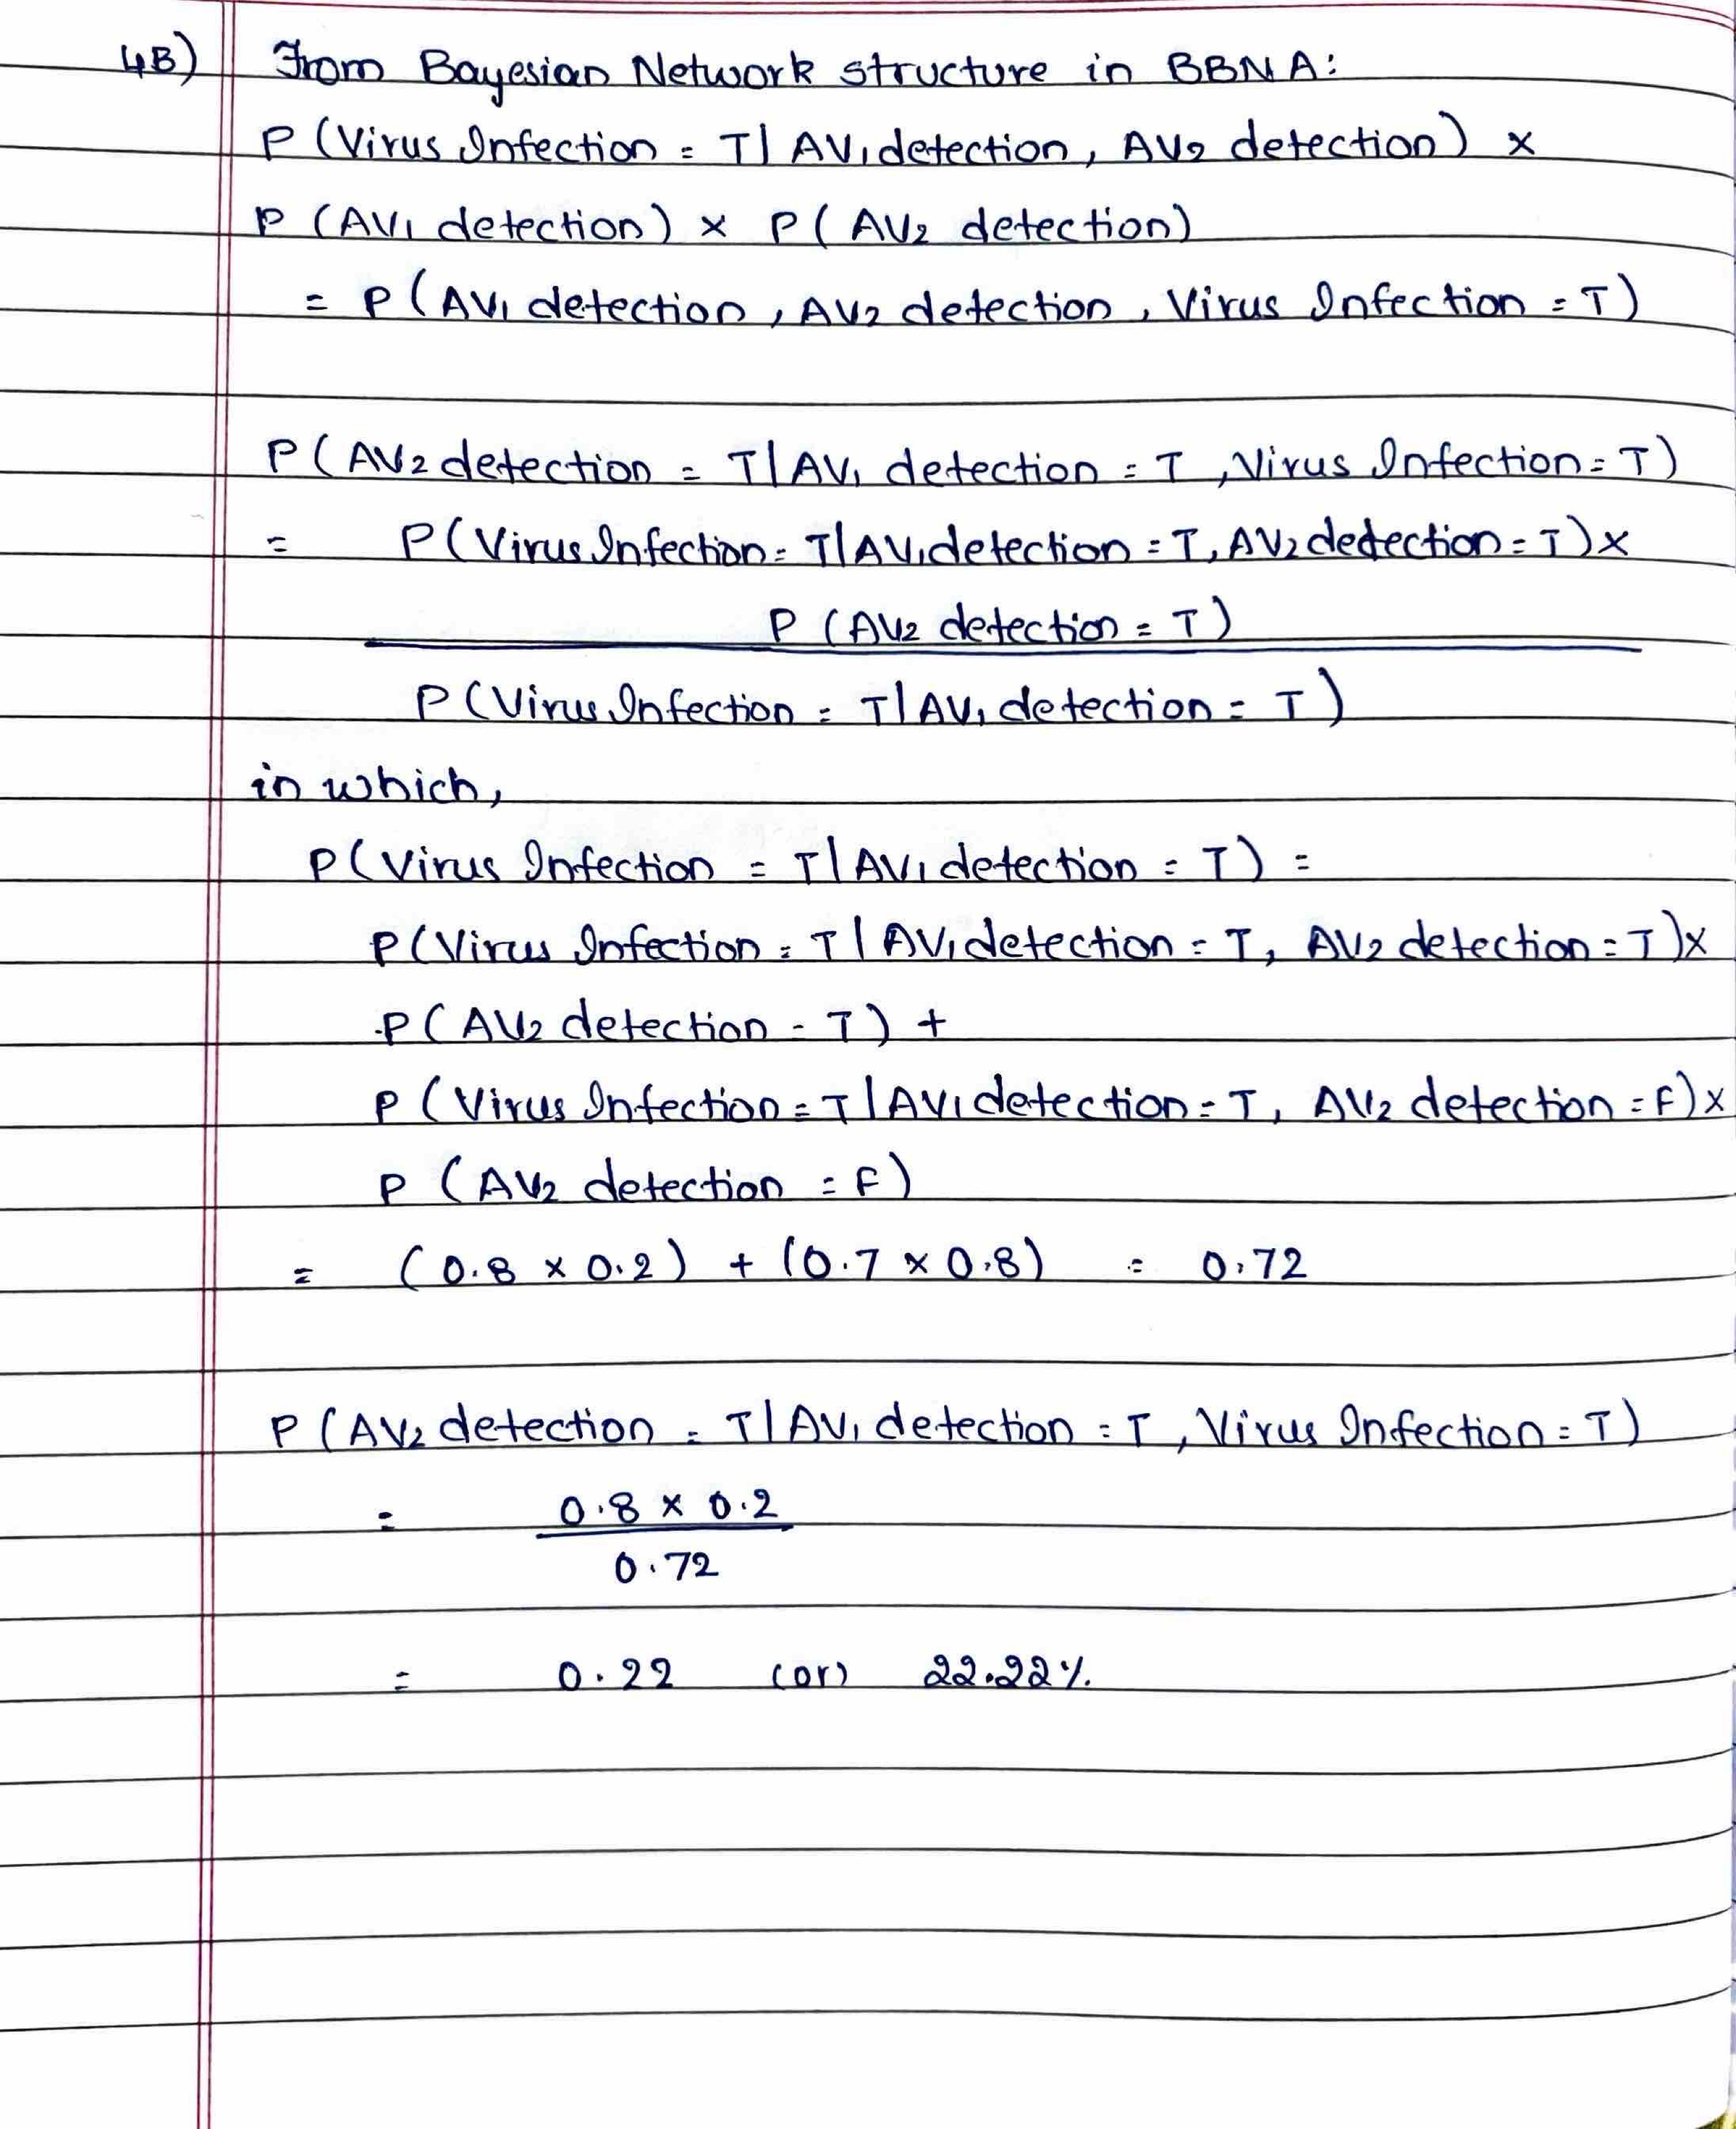

## Q5. (25 points) Classification using Sklearn and Model Evaluation

The objective of this question is to introduce you to Scikit-Learn and its various tools for creating and assessing classification models. You will work with the Customer_Churn_Telecom dataset. First, you'll need to perform some data preprocessing tasks on this dataset. After that, your task is to utilize Scikit-Learn to construct a range of classifiers using this dataset, followed by evaluating the performance of these models. To gain a better understanding of the specific steps involved, please proceed to read the subsequent sections of the question for further instructions.

In [12]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [14]:
#lets print the first five rows
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [16]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##

df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [17]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##

# Replacing 'Yes' and 'No' values
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

# Replacing 'Female' and 'Male' values
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

# Printing the unique values after replacement to verify
print_unique_col_values(df)

df.head()

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [18]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##

df2 = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

In [19]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0  0.000000             0   
1       0              0        0           0  0.464789             1   
2       0              0        0           0  0.014085             1   
3       0              0        0           0  0.619718             0   
4       1              0        0           0  0.014085             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [20]:
# Train test split
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
## END CODE ##

In [21]:
# Write code to make train and validation splits

## START CODE ##
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15, stratify=y_train)
## END CODE ##

In [22]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

In [23]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


## CODE HERE ##
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_val_tree = clf_tree.predict(X_val)
y_pred_test_tree = clf_tree.predict(X_test)
print("Decision Tree Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_pred_val_tree))
print("Decision Tree Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test_tree))


print("\nDecision Tree Metrics (Validation):")
print("Accuracy:", accuracy_score(y_val, y_pred_val_tree))
print("Recall:", recall_score(y_val, y_pred_val_tree))
print("Precision:", precision_score(y_val, y_pred_val_tree))
print("F1 Score:", f1_score(y_val, y_pred_val_tree))
print("\nDecision Tree Metrics (Test):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_tree))
print("Recall:", recall_score(y_test, y_pred_test_tree))
print("Precision:", precision_score(y_test, y_pred_test_tree))
print("F1 Score:", f1_score(y_test, y_pred_test_tree))


Decision Tree Confusion Matrix (Validation):
 [[657 169]
 [152 147]]
Decision Tree Confusion Matrix (Test):
 [[841 192]
 [196 178]]

Decision Tree Metrics (Validation):
Accuracy: 0.7146666666666667
Recall: 0.4916387959866221
Precision: 0.4651898734177215
F1 Score: 0.4780487804878049

Decision Tree Metrics (Test):
Accuracy: 0.7242359630419332
Recall: 0.47593582887700536
Precision: 0.4810810810810811
F1 Score: 0.478494623655914


In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##
clf_logreg = LogisticRegression(max_iter=1000)
clf_logreg.fit(X_train, y_train)
y_pred_val_logreg = clf_logreg.predict(X_val)
y_pred_test_logreg = clf_logreg.predict(X_test)
print("\nLogistic Regression Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_pred_val_logreg))
print("Logistic Regression Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test_logreg))

print("\nLogistic Regression Metrics (Validation):")
print("Accuracy:", accuracy_score(y_val, y_pred_val_logreg))
print("Recall:", recall_score(y_val, y_pred_val_logreg))
print("Precision:", precision_score(y_val, y_pred_val_logreg))
print("F1 Score:", f1_score(y_val, y_pred_val_logreg))
print("\nLogistic Regression Metrics (Test):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_logreg))
print("Recall:", recall_score(y_test, y_pred_test_logreg))
print("Precision:", precision_score(y_test, y_pred_test_logreg))
print("F1 Score:", f1_score(y_test, y_pred_test_logreg))


Logistic Regression Confusion Matrix (Validation):
 [[734  92]
 [143 156]]
Logistic Regression Confusion Matrix (Test):
 [[929 104]
 [170 204]]

Logistic Regression Metrics (Validation):
Accuracy: 0.7911111111111111
Recall: 0.5217391304347826
Precision: 0.6290322580645161
F1 Score: 0.5703839122486288

Logistic Regression Metrics (Test):
Accuracy: 0.8052594171997157
Recall: 0.5454545454545454
Precision: 0.6623376623376623
F1 Score: 0.5982404692082111


In [25]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##
clf_mlp = MLPClassifier(max_iter=1000)
clf_mlp.fit(X_train, y_train)
y_pred_val_mlp = clf_mlp.predict(X_val)
y_pred_test_mlp = clf_mlp.predict(X_test)
print("\nMLP Classifier Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_pred_val_mlp))
print("MLP Classifier Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test_mlp))

print("\nMLP Classifier Metrics (Validation):")
print("Accuracy:", accuracy_score(y_val, y_pred_val_mlp))
print("Recall:", recall_score(y_val, y_pred_val_mlp))
print("Precision:", precision_score(y_val, y_pred_val_mlp))
print("F1 Score:", f1_score(y_val, y_pred_val_mlp))
print("\nMLP Classifier Metrics (Test):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_mlp))
print("Recall:", recall_score(y_test, y_pred_test_mlp))
print("Precision:", precision_score(y_test, y_pred_test_mlp))
print("F1 Score:", f1_score(y_test, y_pred_test_mlp))


MLP Classifier Confusion Matrix (Validation):
 [[694 132]
 [150 149]]
MLP Classifier Confusion Matrix (Test):
 [[890 143]
 [186 188]]

MLP Classifier Metrics (Validation):
Accuracy: 0.7493333333333333
Recall: 0.4983277591973244
Precision: 0.5302491103202847
F1 Score: 0.5137931034482758

MLP Classifier Metrics (Test):
Accuracy: 0.7661691542288557
Recall: 0.5026737967914439
Precision: 0.56797583081571
F1 Score: 0.5333333333333334


(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

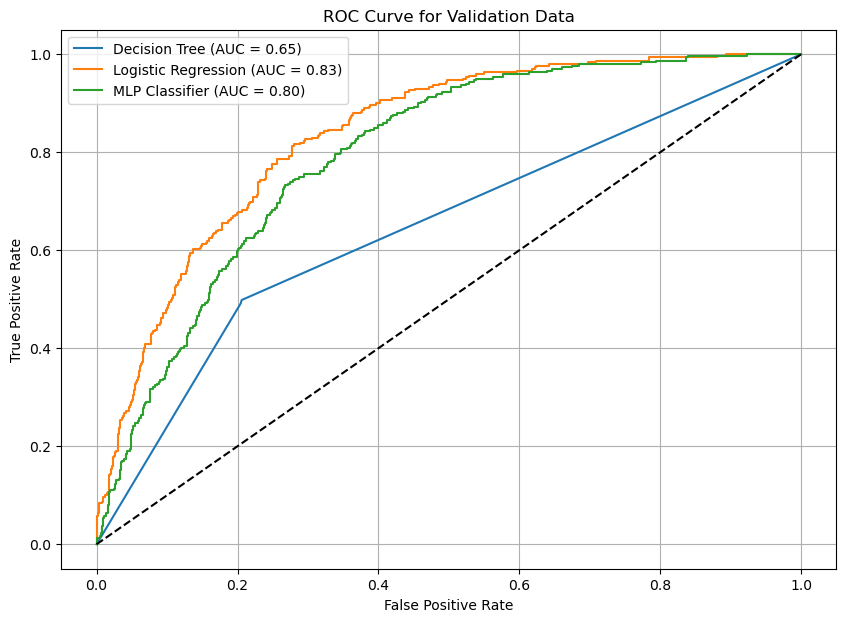

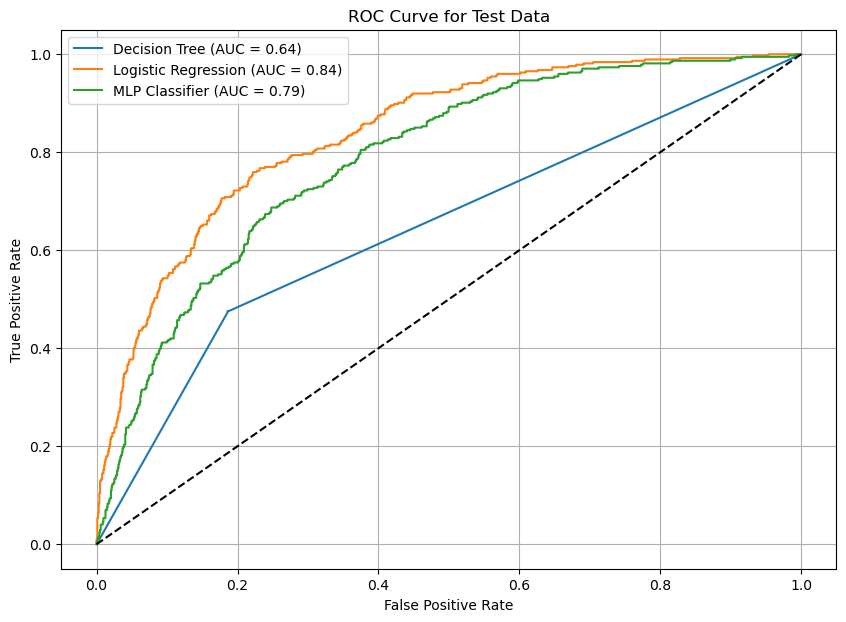

In [26]:
# Plot ROC curves

from sklearn.metrics import roc_curve, roc_auc_score

## CODE HERE ##
import matplotlib.pyplot as plt

# Getting predicted probabilities for the positive class
y_prob_val_tree = clf_tree.predict_proba(X_val)[:, 1]
y_prob_test_tree = clf_tree.predict_proba(X_test)[:, 1]

y_prob_val_logreg = clf_logreg.predict_proba(X_val)[:, 1]
y_prob_test_logreg = clf_logreg.predict_proba(X_test)[:, 1]

y_prob_val_mlp = clf_mlp.predict_proba(X_val)[:, 1]
y_prob_test_mlp = clf_mlp.predict_proba(X_test)[:, 1]

# Calculating ROC curve and ROC AUC for Validation Data
fpr_val_tree, tpr_val_tree, _ = roc_curve(y_val, y_prob_val_tree)
roc_auc_val_tree = roc_auc_score(y_val, y_prob_val_tree)

fpr_val_logreg, tpr_val_logreg, _ = roc_curve(y_val, y_prob_val_logreg)
roc_auc_val_logreg = roc_auc_score(y_val, y_prob_val_logreg)

fpr_val_mlp, tpr_val_mlp, _ = roc_curve(y_val, y_prob_val_mlp)
roc_auc_val_mlp = roc_auc_score(y_val, y_prob_val_mlp)

# Plotting ROC curves for Validation Data
plt.figure(figsize=(10, 7))
plt.plot(fpr_val_tree, tpr_val_tree, label=f'Decision Tree (AUC = {roc_auc_val_tree:.2f})')
plt.plot(fpr_val_logreg, tpr_val_logreg, label=f'Logistic Regression (AUC = {roc_auc_val_logreg:.2f})')
plt.plot(fpr_val_mlp, tpr_val_mlp, label=f'MLP Classifier (AUC = {roc_auc_val_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Data')
plt.legend()
plt.grid(True)
plt.show()

# Calculating ROC curve and ROC AUC for Test Data
fpr_test_tree, tpr_test_tree, _ = roc_curve(y_test, y_prob_test_tree)
roc_auc_test_tree = roc_auc_score(y_test, y_prob_test_tree)

fpr_test_logreg, tpr_test_logreg, _ = roc_curve(y_test, y_prob_test_logreg)
roc_auc_test_logreg = roc_auc_score(y_test, y_prob_test_logreg)

fpr_test_mlp, tpr_test_mlp, _ = roc_curve(y_test, y_prob_test_mlp)
roc_auc_test_mlp = roc_auc_score(y_test, y_prob_test_mlp)

# Plotting ROC curves for Test Data
plt.figure(figsize=(10, 7))
plt.plot(fpr_test_tree, tpr_test_tree, label=f'Decision Tree (AUC = {roc_auc_test_tree:.2f})')
plt.plot(fpr_test_logreg, tpr_test_logreg, label=f'Logistic Regression (AUC = {roc_auc_test_logreg:.2f})')
plt.plot(fpr_test_mlp, tpr_test_mlp, label=f'MLP Classifier (AUC = {roc_auc_test_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend()
plt.grid(True)
plt.show()

(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

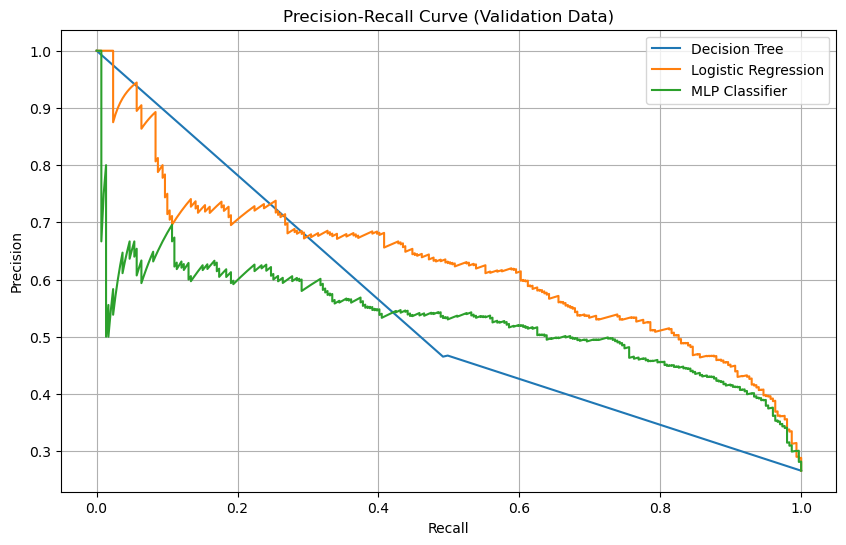

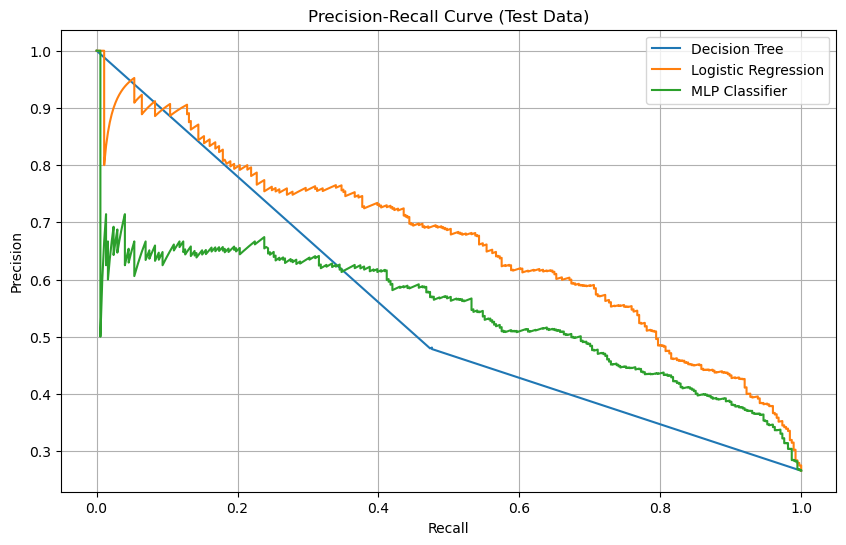

In [27]:
# Plot Precision-Recall curves

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

## CODE HERE ##

plt.figure(figsize=(10, 6))
plt.title("Precision-Recall Curve (Validation Data)")

# Decision Tree
precision, recall, _ = precision_recall_curve(y_val, clf_tree.predict_proba(X_val)[:, 1])
plt.plot(recall, precision, label='Decision Tree')

# Logistic Regression
precision, recall, _ = precision_recall_curve(y_val, clf_logreg.predict_proba(X_val)[:, 1])
plt.plot(recall, precision, label='Logistic Regression')

# MLP Classifier
precision, recall, _ = precision_recall_curve(y_val, clf_mlp.predict_proba(X_val)[:, 1])
plt.plot(recall, precision, label='MLP Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Precision-Recall Curve (Test Data)")

# Decision Tree
precision, recall, _ = precision_recall_curve(y_test, clf_tree.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label='Decision Tree')

# Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, clf_logreg.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label='Logistic Regression')

# MLP Classifier
precision, recall, _ = precision_recall_curve(y_test, clf_mlp.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label='MLP Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()
